In [2]:
# !pip install datasets transformers
# !pip install miditok
# !pip install symusic

In [134]:
from miditok import MMM, MuMIDI, TokenizerConfig
from miditok.pytorch_data import DatasetTok, DataCollator
from pathlib import Path
from symusic import Score
from miditoolkit import MidiFile
import pypianoroll


In [5]:
# Creating a multitrack tokenizer configuration, read the doc to explore other parameters

config = TokenizerConfig(
    num_velocities=16, 
    use_chords=True, 
    use_programs=True,
    use_pitch_intervals=True
    )

TOKENIZER_NAME = MMM # MMM 토크나이저 사용
# TOKENIZER_NAME = MuMIDI # MuMIDI 토크나이저 사용
tokenizer = TOKENIZER_NAME(config)

In [20]:
# Loads a midi, converts to tokens, and back to a MIDI

midi = Score("./test_gen_iter_5.mid")
tokens = tokenizer(midi)  # calling the tokenizer will automatically detect MIDIs, paths and tokens
converted_back_midi = tokenizer(tokens)  # PyTorch / Tensorflow / Numpy tensors supported

In [48]:
tokenizer["EOS_None"]

2

In [47]:
len(tokens.ids),len(tokens.tokens)

(527, 527)

In [42]:
li= [[] for _ in range(4)] 
ids_s = [[] for _ in range(4)] 
print(li)
i=-1
for token in tokens.tokens:
    
    if 'Track_Start' in token:
        print(token)
        i+=1
    li[i].append(token)


[[], [], [], []]
Track_Start
Track_Start
Track_Start
Track_Start


In [51]:
li= [[] for _ in range(4)] 
ids_s = [[] for _ in range(4)] 
for token in tokens.ids:
    
    if 1 == token:
        print(token)


In [44]:
for i in li:
    print(len(i))

47
217
179
84


In [55]:
midi = MidiFile("./test_gen_iter_5.mid")
midi
# 노트 출력
for note in midi.instruments[0].notes:
    print(note)


Note(velocity=87, pitch=41, start=0, end=8)
Note(velocity=87, pitch=53, start=8, end=16)
Note(velocity=87, pitch=51, start=16, end=24)
Note(velocity=87, pitch=46, start=24, end=32)
Note(velocity=87, pitch=45, start=32, end=40)
Note(velocity=87, pitch=44, start=40, end=48)
Note(velocity=87, pitch=44, start=48, end=56)
Note(velocity=87, pitch=43, start=56, end=64)
Note(velocity=87, pitch=41, start=64, end=72)
Note(velocity=87, pitch=39, start=72, end=80)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


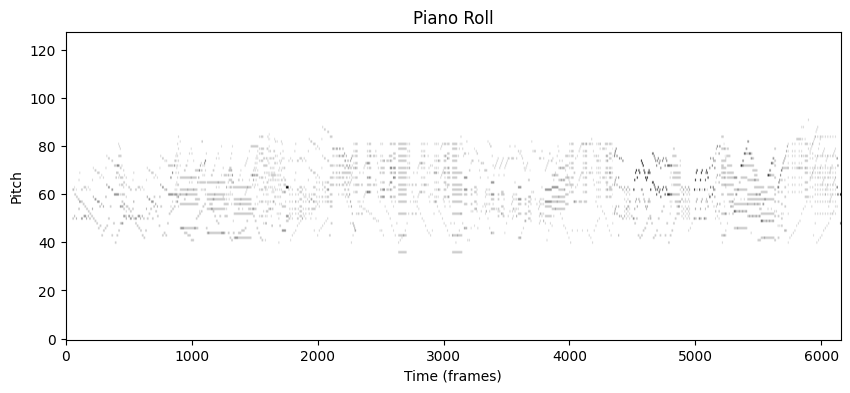

In [179]:
import pretty_midi
import numpy as np
import matplotlib.pyplot as plt
path = './jazz-midi-366-songs/003_20thcenturystomp.mid'
folder = './jazz-midi-366-songs/'
# MIDI 파일 로드
midi_data = pretty_midi.PrettyMIDI(f"{folder}003_20thcenturystomp.mid")

# 피아노 롤 생성
piano_roll = midi_data.get_piano_roll(fs=50)
print(piano_roll)

# 피아노 롤 시각화
plt.figure(figsize=(10, 4))
plt.imshow(piano_roll, aspect='auto', origin='lower', cmap='gray_r')
plt.xlabel('Time (frames)')
plt.ylabel('Pitch')
plt.title('Piano Roll')
plt.show()


In [93]:
piano_roll

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [79]:
program_numbers = [instrument.program for instrument in midi_data.instruments]
program_numbers
for i in program_numbers:
    instrument_name = pretty_midi.program_to_instrument_name(i)
    print(i,instrument_name)

61 Brass Section
61 Brass Section
81 Lead 2 (sawtooth)
81 Lead 2 (sawtooth)
61 Brass Section
81 Lead 2 (sawtooth)
61 Brass Section
32 Acoustic Bass
0 Acoustic Grand Piano


In [102]:
piano_roll.max()

635.0

In [89]:
x =set()
for i in piano_roll:
    for j in i:
        x.add(j)
x

{0.0, 127.0, 254.0, 381.0, 508.0, 635.0}

In [97]:
initial = np.zeros((16384,16384))
initial.shape

(16384, 16384)

61
127.0 0.0


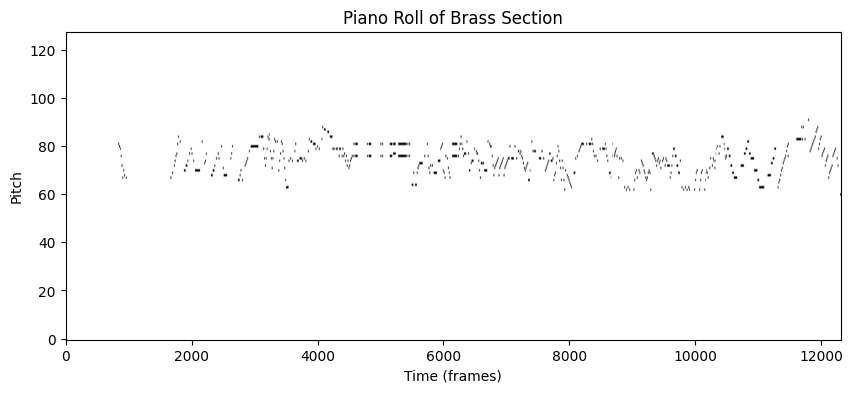

61
254.0 0.0


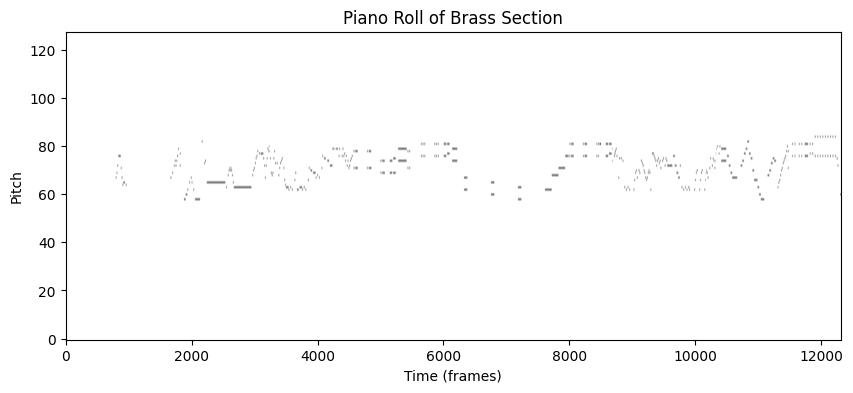

81
127.0 0.0


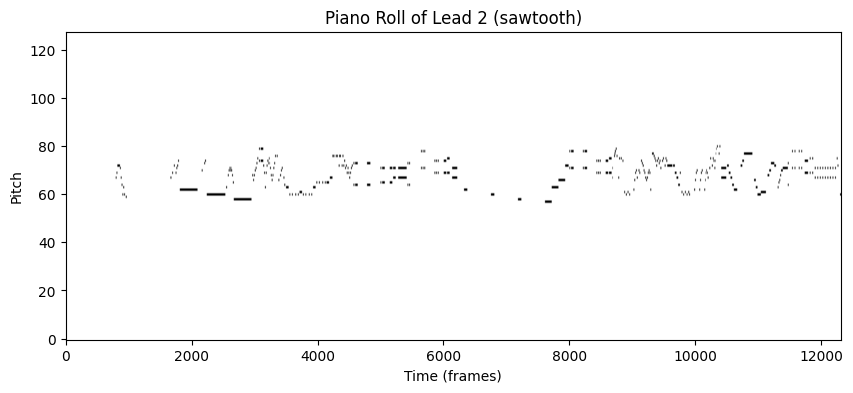

81
127.0 0.0


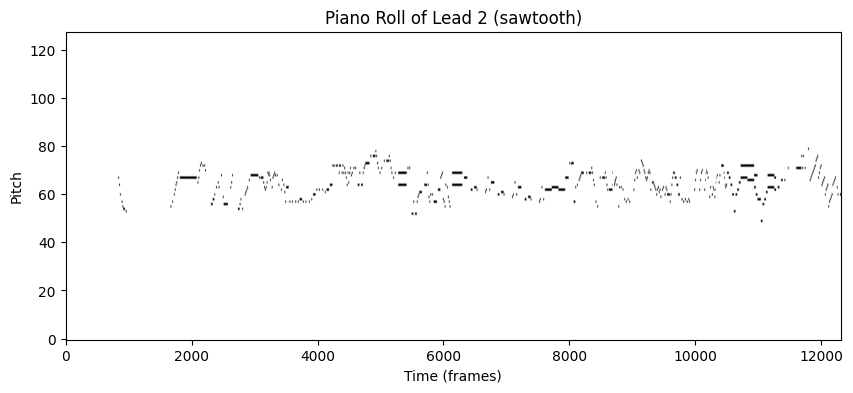

61
127.0 0.0


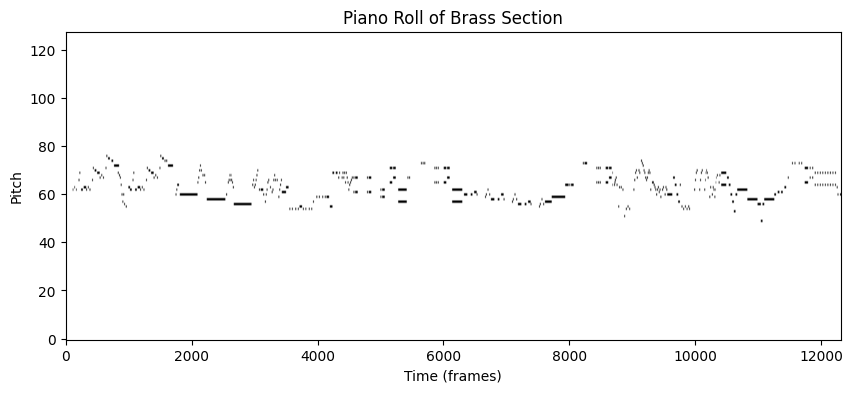

81
127.0 0.0


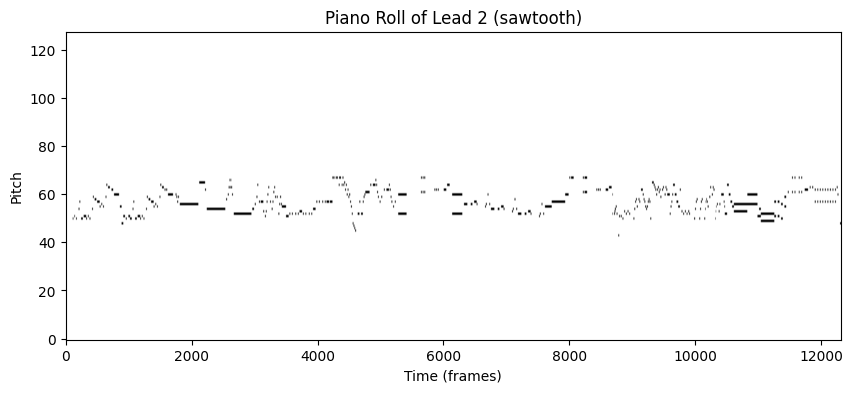

61
254.0 0.0


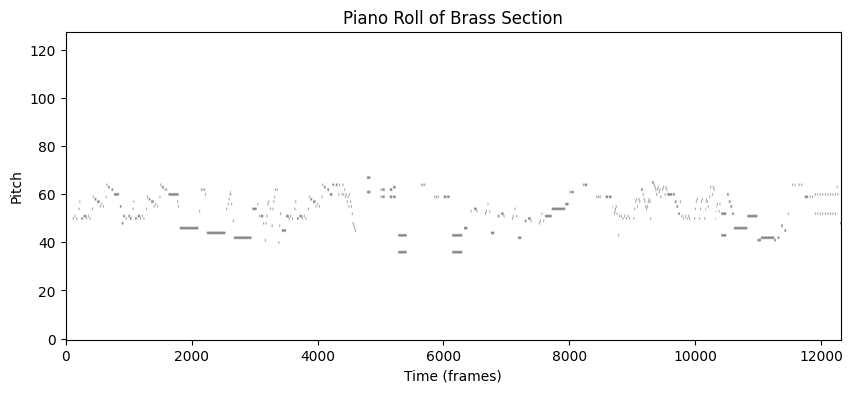

32
127.0 0.0


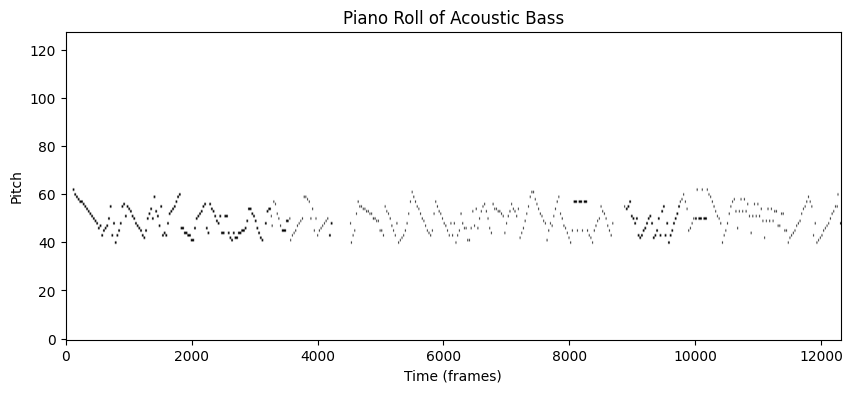

In [148]:
import pretty_midi
import numpy as np
import matplotlib.pyplot as plt


# 악기별로 피아노 롤 생성 및 시각화
for instrument in midi_data.instruments:
    # 악기가 드럼 트랙이면 건너뛰기
    if instrument.is_drum:
        continue
    
    # 악기의 이름 가져오기 (프로그램 번호로부터)
    instrument_name = pretty_midi.program_to_instrument_name(instrument.program)
    print(instrument.program)
    
    # 해당 악기의 피아노 롤 생성
    piano_roll = instrument.get_piano_roll(fs=100)
    print(piano_roll.max(), piano_roll.min())
    
    # 피아노 롤 시각화
    plt.figure(figsize=(10, 4))
    plt.imshow(piano_roll, aspect='auto', origin='lower', cmap='gray_r')
    plt.xlabel('Time (frames)')
    plt.ylabel('Pitch')
    plt.title(f'Piano Roll of {instrument_name}')
    plt.show()


In [114]:
import pretty_midi

# MIDI 파일 로드

# 특정 악기의 Piano Roll 가져오기, 여기서는 첫 번째 악기 사용
# fs는 초당 프레임 수를 나타냄, 더 높은 값은 더 세밀한 시간 해상도를 의미
piano_roll = midi_data.instruments[0].get_piano_roll(fs=100)

print(piano_roll.shape)


(128, 12308)


In [118]:
piano_roll = midi_data.instruments[2].get_piano_roll(fs=100)
print(piano_roll.shape)


(128, 12308)


### 2차원 배열 다시 midi로

In [209]:
import pretty_midi
import numpy as np
import matplotlib.pyplot as plt

midi = pretty_midi.PrettyMIDI()

# 악기별로 피아노 롤 생성 및 시각화
for instrument in midi_data.instruments:
    # 악기가 드럼 트랙이면 건너뛰기
    if instrument.is_drum:
        continue
    
    # 악기의 이름 가져오기 (프로그램 번호로부터)
    instrument_name = pretty_midi.program_to_instrument_name(instrument.program)
    fs = 100 
    # 해당 악기의 피아노 롤 생성
    piano_roll = instrument.get_piano_roll(fs=fs)
    print(instrument.program, piano_roll.max())

    instrument = pretty_midi.Instrument(program=instrument.program)
     # 초당 프레임 수

    for pitch, notes in enumerate(piano_roll):
        for start, value in enumerate(notes):
            if value >127:
                value=127
            if value > 0:  # 노트가 존재하는 경우
                end = start + 1  # 노트 지속 시간 설정
                # 노트 객체 생성
                note = pretty_midi.Note(
                    velocity=int(value),  # 벨로시티 값 설정
                    pitch=pitch,  # 피치 값 설정
                    start=start / fs*2,  # 시작 시간 설정
                    end=end / fs*2  # 종료 시간 설정
                )
                # 악기에 노트 추가
                instrument.notes.append(note)

    # PrettyMIDI 객체에 악기 추가
    midi.instruments.append(instrument)
midi.write('output.mid')




61 127.0
61 254.0
81 127.0
81 127.0
61 127.0
81 127.0
61 254.0
32 127.0


In [185]:
import pretty_midi
import numpy as np
import matplotlib.pyplot as plt


midi = pretty_midi.PrettyMIDI()

for instrument in midi_data.instruments:
    if instrument.is_drum:
        continue

    fs = 100
    piano_roll = instrument.get_piano_roll(fs=fs)
    print(instrument.program, piano_roll.max())

    
    new_instrument = pretty_midi.Instrument(program=instrument.program)

    for pitch, notes in enumerate(piano_roll):
        notes[notes >= 127] = 127

        current_note_start = None
        current_note_velocity = 0

        for time_step, velocity in enumerate(notes):
            if velocity > 0 and current_note_start is None:
                # 노트 시작
                current_note_start = time_step / fs
                current_note_velocity = velocity
            elif velocity == 0 and current_note_start is not None:
                # 노트 종료
                note = pretty_midi.Note(
                    velocity=int(current_note_velocity),
                    pitch=pitch,
                    start=current_note_start,
                    end=time_step / fs
                )
                new_instrument.notes.append(note)
                current_note_start = None

        # 연속적인 노트가 마지막까지 이어지는 경우
        if current_note_start is not None:
            note = pretty_midi.Note(
                velocity=int(current_note_velocity),
                pitch=pitch,
                start=current_note_start,
                end=len(notes) / fs
            )
            new_instrument.notes.append(note)

    midi.instruments.append(new_instrument)

midi.write('output_fixed.mid')


61 127.0
61 254.0
81 127.0
81 127.0
61 127.0
81 127.0
61 254.0
32 127.0


In [203]:
len(midi.instruments[7].notes)

421

In [204]:
len(midi_data.instruments[7].notes)

448

In [181]:
import pretty_midi
import numpy as np
import matplotlib.pyplot as plt

midi = pretty_midi.PrettyMIDI()

# 악기별로 피아노 롤 생성 및 시각화
for instrument in midi_data.instruments:
    # 악기가 드럼 트랙이면 건너뛰기
    if instrument.is_drum:
        continue
    
    # 악기의 이름 가져오기 (프로그램 번호로부터)
    instrument_name = pretty_midi.program_to_instrument_name(instrument.program)
    fs = 100 
    # 해당 악기의 피아노 롤 생성
    piano_roll = instrument.get_piano_roll(fs=fs)
    print(instrument.program, piano_roll.max())

    instrument = pretty_midi.Instrument(program=instrument.program)
     # 초당 프레임 수

    for pitch, notes in enumerate(piano_roll):
        notes[notes >= 127] = 127
        start = None  # 노트 시작 지점 초기화
        for i, value in enumerate(notes):
            if value > 0 and start is None:  # 노트 시작 지점 찾기
                start = i
            elif value == 0 and start is not None:  # 노트 종료 지점 찾기
                end = i
                # 노트 객체 생성 및 추가
                note = pretty_midi.Note(
                    velocity=int(notes[start]),  # 시작 지점의 벨로시티 사용
                    pitch=pitch,
                    start=start / fs,
                    end=end / fs
                )
                instrument.notes.append(note)
                start = None  # 다음 노트를 위해 시작 지점 초기화
        # 마지막 노트 처리 (노트가 파일 끝까지 지속되는 경우)
        if start is not None:
            note = pretty_midi.Note(
                velocity=int(notes[start]),
                pitch=pitch,
                start=start / fs,
                end=len(notes) / fs
            )
            instrument.notes.append(note)
    midi.instruments.append(instrument)
midi.write('output6.mid')




61 127.0
61 254.0
81 127.0
81 127.0
61 127.0
81 127.0
61 254.0
32 127.0


In [183]:
import pretty_midi
import numpy as np
import matplotlib.pyplot as plt

midi_data2 = pretty_midi.PrettyMIDI(f"output.mid")

# 악기별로 피아노 롤 생성 및 시각화
for instrument in midi_data2.instruments:
    # 악기가 드럼 트랙이면 건너뛰기
    if instrument.is_drum:
        continue
    
    # 악기의 이름 가져오기 (프로그램 번호로부터)
    instrument_name = pretty_midi.program_to_instrument_name(instrument.program)
    print(instrument.program)
    
    # 해당 악기의 피아노 롤 생성
    piano_roll = instrument.get_piano_roll(fs=100)
    print(piano_roll.max(), piano_roll.min())
    
    # 피아노 롤 시각화
    plt.figure(figsize=(10, 4))
    plt.imshow(piano_roll, aspect='auto', origin='lower', cmap='gray_r')
    plt.xlabel('Time (frames)')
    plt.ylabel('Pitch')
    plt.title(f'Piano Roll of {instrument_name}')
    plt.show()


In [220]:
multitrack = pypianoroll.read(path)
print(multitrack)


Multitrack(name=None, resolution=24, tempo=array(shape=(11040, 1), dtype=float64), downbeat=array(shape=(11040, 1), dtype=bool), tracks=[StandardTrack(name='tpt', program=61, is_drum=False, pianoroll=array(shape=(11040, 128), dtype=uint8)), StandardTrack(name='tpt', program=61, is_drum=False, pianoroll=array(shape=(11040, 128), dtype=uint8)), StandardTrack(name='tpt', program=81, is_drum=False, pianoroll=array(shape=(11040, 128), dtype=uint8)), StandardTrack(name='tbn', program=81, is_drum=False, pianoroll=array(shape=(11040, 128), dtype=uint8)), StandardTrack(name='tbn', program=61, is_drum=False, pianoroll=array(shape=(11040, 128), dtype=uint8)), StandardTrack(name='sax', program=81, is_drum=False, pianoroll=array(shape=(11040, 128), dtype=uint8)), StandardTrack(name='sax', program=61, is_drum=False, pianoroll=array(shape=(11040, 128), dtype=uint8)), StandardTrack(name='bass', program=32, is_drum=False, pianoroll=array(shape=(11040, 128), dtype=uint8)), StandardTrack(name='drums', pr

In [223]:
multitrack.tracks

[StandardTrack(name='tpt', program=61, is_drum=False, pianoroll=array(shape=(11040, 128), dtype=uint8)),
 StandardTrack(name='tpt', program=61, is_drum=False, pianoroll=array(shape=(11040, 128), dtype=uint8)),
 StandardTrack(name='tpt', program=81, is_drum=False, pianoroll=array(shape=(11040, 128), dtype=uint8)),
 StandardTrack(name='tbn', program=81, is_drum=False, pianoroll=array(shape=(11040, 128), dtype=uint8)),
 StandardTrack(name='tbn', program=61, is_drum=False, pianoroll=array(shape=(11040, 128), dtype=uint8)),
 StandardTrack(name='sax', program=81, is_drum=False, pianoroll=array(shape=(11040, 128), dtype=uint8)),
 StandardTrack(name='sax', program=61, is_drum=False, pianoroll=array(shape=(11040, 128), dtype=uint8)),
 StandardTrack(name='bass', program=32, is_drum=False, pianoroll=array(shape=(11040, 128), dtype=uint8)),
 StandardTrack(name='drums', program=0, is_drum=True, pianoroll=array(shape=(11040, 128), dtype=uint8))]

In [224]:
multitrack.tracks[0].pianoroll

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

<Axes: xlabel='time (step)', ylabel='pitch'>

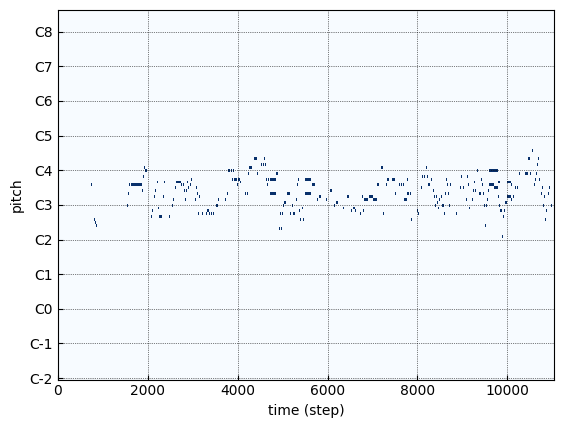

In [232]:
multitrack.tracks[3].plot()

In [50]:
import preprocess
import miditoolkit
import matplotlib.pyplot as plt
import numpy as np


In [9]:
text= "<3-128> <4-64> <5-32> <6-16> <7-8> <8-4> <9-2> <10-1>"

preprocess.str_to_encoding(text)

[(128, 64, 32, 16, 8, 4, 2, -1)]

In [21]:
midi_obj = miditoolkit.midi.parser.MidiFile('./003_20thcenturystomp.mid')
encod = preprocess.MIDI_to_encoding(midi_obj)
preprocess.encoding_to_MIDI(encod)

AttributeError: module 'miditoolkit' has no attribute 'containers'

In [215]:
from miditoolkit.midi import parser as mid_parser
from miditoolkit.pianoroll import parser as pr_parser
from miditoolkit.pianoroll import utils
import os
from collections import Counter
from tqdm import tqdm

In [88]:
# load midi file
path_midi = './003_20thcenturystomp.mid'
mido_obj = mid_parser.MidiFile(path_midi)
print(mido_obj.instruments)
notes = mido_obj.instruments[1].notes
program = mido_obj.instruments[1].program
# print(program)

# # convert notes to pianoroll
# pianoroll = pr_parser.notes2pianoroll(
#                     notes)

# # pianoroll: tick x pitch
# print(pianoroll.shape)
# pianoroll.max()

[Instrument(program=61, is_drum=False, name=tpt) - 482 notes, Instrument(program=61, is_drum=False, name=tpt) - 362 notes, Instrument(program=81, is_drum=False, name=tpt) - 325 notes, Instrument(program=81, is_drum=False, name=tbn) - 397 notes, Instrument(program=61, is_drum=False, name=tbn) - 371 notes, Instrument(program=81, is_drum=False, name=sax) - 377 notes, Instrument(program=61, is_drum=False, name=sax) - 346 notes, Instrument(program=32, is_drum=False, name=bass) - 448 notes, Instrument(program=0, is_drum=True, name=drums) - 627 notes]


In [89]:
pianoroll = pr_parser.notes2pianoroll(
                    notes, 
                    resample_factor=1)
pianoroll.shape

(55140, 28)

In [48]:
pianoroll.shape

(5514000, 28)

In [45]:
notes_re = pr_parser.pianoroll2notes(
                    pianoroll,
                    resample_factor=1/100)

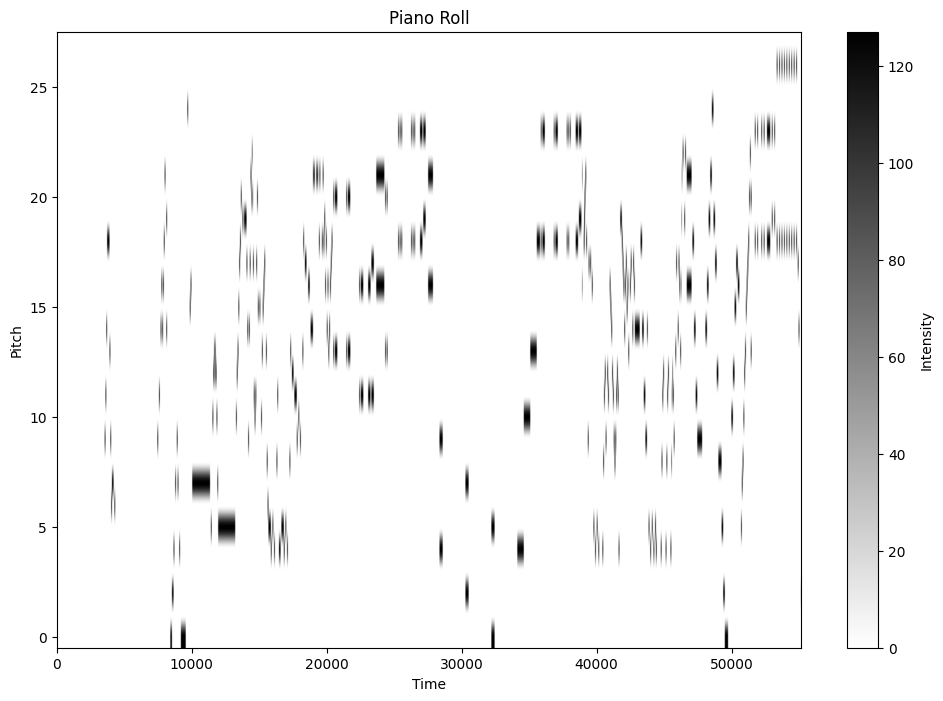

In [51]:
# 피아노 롤 시각화
plt.figure(figsize=(12, 8))  # 이미지 크기 설정
plt.imshow(pianoroll.T, aspect='auto', origin='lower', cmap='gray_r')
plt.xlabel('Time')
plt.ylabel('Pitch')
plt.title('Piano Roll')
plt.colorbar(label='Intensity')
plt.show()


(5514, 128)


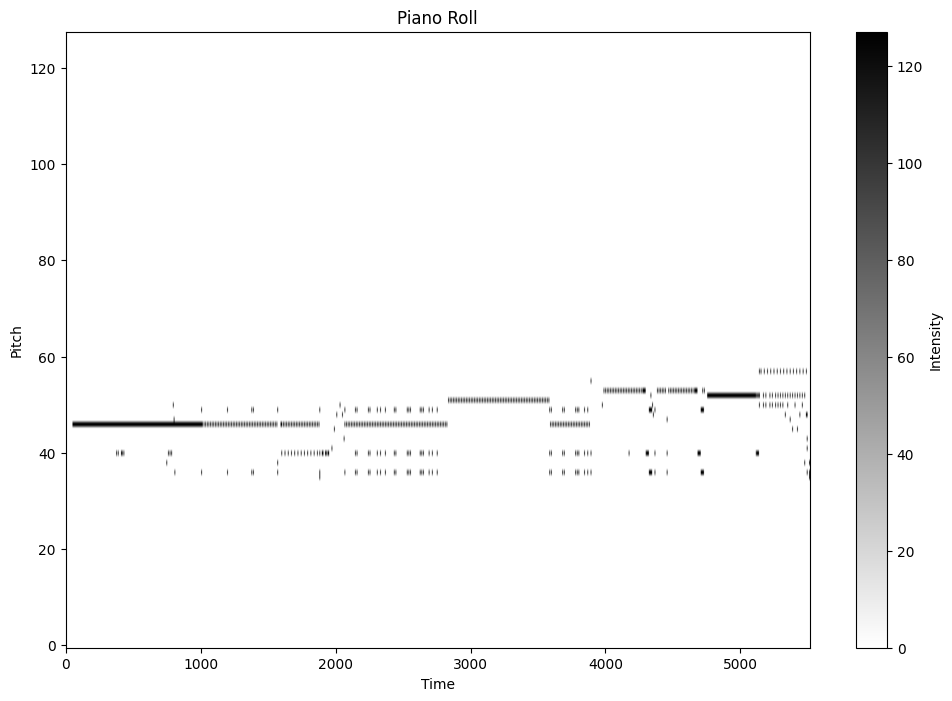

In [202]:
pianoroll = pr_parser.notes2pianoroll(
                    notes,                     
                    resample_factor=0.1,
                    pitch_range=(0,127))
print(pianoroll.shape)
# 피아노 롤 시각화
plt.figure(figsize=(12, 8))  # 이미지 크기 설정
plt.imshow(pianoroll.T, aspect='auto', origin='lower', cmap='gray_r')
plt.xlabel('Time')
plt.ylabel('Pitch')
plt.title('Piano Roll')
plt.colorbar(label='Intensity')
plt.show()


In [204]:
pianoroll[:1024].shape

(1024, 128)

In [98]:
frac =0.1
path_midi = './003_20thcenturystomp.mid'
mido_obj = mid_parser.MidiFile(path_midi)
print(mido_obj.instruments)
notes = mido_obj.instruments[1].notes
program = mido_obj.instruments[1].program

pianoroll = pr_parser.notes2pianoroll(
                    notes,                     
                    resample_factor=frac,
                    pitch_range=(0,127))
# 가정: notes_re는 miditoolkit.Note 객체의 리스트입니다.
notes_re = pr_parser.pianoroll2notes(
                    pianoroll,
                    resample_factor=1/frac*3,
                    pitch_range=(0,127))

# 새로운 MidiFile 객체 생성
midi_obj = miditoolkit.MidiFile()

# 새로운 Instrument 객체 생성 (여기서는 프로그램 0을 사용합니다 - 피아노)
instrument = miditoolkit.Instrument(program=program)

# 변환된 노트를 Instrument 객체에 추가
instrument.notes = notes_re

# Instrument 객체를 MidiFile 객체에 추가
midi_obj.instruments.append(instrument)

# MidiFile 객체를 파일로 저장
midi_obj.dump('output_midi_file.mid')

[Instrument(program=61, is_drum=False, name=tpt) - 482 notes, Instrument(program=61, is_drum=False, name=tpt) - 362 notes, Instrument(program=81, is_drum=False, name=tpt) - 325 notes, Instrument(program=81, is_drum=False, name=tbn) - 397 notes, Instrument(program=61, is_drum=False, name=tbn) - 371 notes, Instrument(program=81, is_drum=False, name=sax) - 377 notes, Instrument(program=61, is_drum=False, name=sax) - 346 notes, Instrument(program=32, is_drum=False, name=bass) - 448 notes, Instrument(program=0, is_drum=True, name=drums) - 627 notes]


In [200]:
frac =0.1
path_midi = './003_20thcenturystomp.mid'
mido_obj = mid_parser.MidiFile(path_midi)
midi = miditoolkit.MidiFile()
print(mido_obj)

for i in range(len(mido_obj.instruments)):

    notes = mido_obj.instruments[i].notes
    program = mido_obj.instruments[i].program

    pianoroll = pr_parser.notes2pianoroll(
                        notes,                     
                        resample_factor=frac,
                        pitch_range=(0,127))
    # 가정: notes_re는 miditoolkit.Note 객체의 리스트입니다.
    notes_re = pr_parser.pianoroll2notes(
                        pianoroll,
                        resample_factor=1/frac,
                        pitch_range=(0,127))

    # 새로운 MidiFile 객체 생성
    # 새로운 Instrument 객체 생성 (여기서는 프로그램 0을 사용합니다 - 피아노)
    instrument = miditoolkit.Instrument(program=program)

    # 변환된 노트를 Instrument 객체에 추가
    instrument.notes = notes_re

    # Instrument 객체를 MidiFile 객체에 추가
    midi.instruments.append(instrument)
print()
print(midi)
print()

midi.ticks_per_beat = mido_obj.ticks_per_beat
midi.time_signature_changes = mido_obj.time_signature_changes
midi.key_signature_changes = mido_obj.key_signature_changes
midi.tempo_changes = mido_obj.tempo_changes
# midi.max_tick = mido_obj.max_tick
print(midi)

# MidiFile 객체를 파일로 저장
midi.dump('output_midi_file.mid')

ticks per beat: 120
max tick: 55141
tempo changes: 1
time sig: 1
key sig: 8
markers: 1
lyrics: False
instruments: 9

ticks per beat: 480
max tick: 0
tempo changes: 0
time sig: 0
key sig: 0
markers: 0
lyrics: False
instruments: 9

ticks per beat: 120
max tick: 0
tempo changes: 1
time sig: 1
key sig: 8
markers: 0
lyrics: False
instruments: 9


In [272]:
frac =0.01
path_midi = '/data/ephemeral/LEVEL3_project/jazz_chunk/001_11pmtheme/2.mid'
mido_obj = mid_parser.MidiFile(path_midi)
midi = miditoolkit.MidiFile()
print(mido_obj)
key=[0,32,56,57,66,65,26]
for i in range(len(mido_obj.instruments)):
    

    notes = mido_obj.instruments[i].notes
    program = mido_obj.instruments[i].program
    if mido_obj.instruments[i].is_drum:

        continue
    if not program in key:

        continue
    
    print(mido_obj.instruments[i])
    pianoroll = pr_parser.notes2pianoroll(
                        notes,                     
                        resample_factor=frac,
                        pitch_range=(0,127))
    print(pianoroll.shape)
    # 가정: notes_re는 miditoolkit.Note 객체의 리스트입니다.
    notes_re = pr_parser.pianoroll2notes(
                        pianoroll[:1024],
                        resample_factor=1/frac,
                        pitch_range=(0,127))

    # 새로운 MidiFile 객체 생성
    # 새로운 Instrument 객체 생성 (여기서는 프로그램 0을 사용합니다 - 피아노)
    instrument = miditoolkit.Instrument(program=program)

    # 변환된 노트를 Instrument 객체에 추가
    instrument.notes = notes_re

    # Instrument 객체를 MidiFile 객체에 추가
    midi.instruments.append(instrument)
print()

midi.ticks_per_beat = mido_obj.ticks_per_beat
midi.time_signature_changes = mido_obj.time_signature_changes
midi.key_signature_changes = mido_obj.key_signature_changes
midi.tempo_changes = mido_obj.tempo_changes
midi.max_tick = mido_obj.max_tick
print(midi)

# MidiFile 객체를 파일로 저장
midi.dump('output_midi.mid')

ticks per beat: 480
max tick: 79912
tempo changes: 26
time sig: 9
key sig: 1
markers: 5
lyrics: False
instruments: 8
Instrument(program=26, is_drum=False, name=Full Acoustic Electric Guitar) - 80 notes
(383, 128)
Instrument(program=32, is_drum=False, name=Acoustic Bass) - 154 notes
(383, 128)
Instrument(program=26, is_drum=False, name=g-solo) - 182 notes
(264, 128)

ticks per beat: 480
max tick: 79912
tempo changes: 26
time sig: 9
key sig: 1
markers: 0
lyrics: False
instruments: 3


In [154]:
mido_obj.ticks_per_beat

120

In [153]:
mido_obj.tempo_changes

[TempoChange(tempo=224.00011946673038, time=0)]

In [152]:
mido_obj.key_signature_changes


[KeySignature(key_name='C', time=0),
 KeySignature(key_name='Eb', time=7680),
 KeySignature(key_name='Ab', time=9600),
 KeySignature(key_name='Db', time=11520),
 KeySignature(key_name='C', time=13440),
 KeySignature(key_name='Bb', time=27840),
 KeySignature(key_name='Ab', time=29760),
 KeySignature(key_name='C', time=31680)]

In [151]:
mido_obj.time_signature_changes


[TimeSignature(numerator=4, denominator=4, time=0)]

In [226]:

y = mid_parser.MidiFile(path_midi)
for j in y.instruments:
    print(j.program)

61
61
81
81
61
81
61
32
0


In [255]:
x= list()
dir = './jazz-midi-366-songs/'
print(len(os.listdir(dir)))
for i in tqdm(os.listdir(dir)):
    a=set()
    try:
        y = mid_parser.MidiFile(f'{dir}{i}')
        for j in y.instruments:
            a.add(j.program)            
            
    except: 
        pass
    x.extend(a)

366


100%|██████████| 366/366 [00:54<00:00,  6.70it/s]


In [256]:
Counter(x)

Counter({0: 308,
         32: 231,
         56: 105,
         66: 102,
         65: 96,
         26: 89,
         57: 87,
         40: 68,
         67: 65,
         35: 61,
         24: 51,
         59: 48,
         11: 46,
         73: 38,
         4: 35,
         33: 33,
         61: 27,
         1: 20,
         48: 20,
         28: 16,
         64: 14,
         27: 12,
         53: 10,
         18: 9,
         25: 9,
         29: 9,
         5: 9,
         60: 9,
         22: 8,
         87: 8,
         89: 8,
         17: 8,
         71: 7,
         16: 7,
         82: 7,
         58: 6,
         36: 6,
         75: 6,
         49: 6,
         119: 6,
         2: 6,
         72: 6,
         39: 5,
         81: 5,
         30: 5,
         62: 5,
         120: 5,
         43: 5,
         114: 4,
         41: 4,
         12: 4,
         45: 4,
         51: 4,
         94: 4,
         80: 4,
         68: 3,
         122: 3,
         38: 3,
         77: 3,
         50: 3,
         52: 3

In [223]:
[s for s in x if 'tpt' in s]

[(61, 'tpt'), (81, 'tpt')]

In [254]:
count = Counter(x)
count[33]

35

In [ ]:
key=[0,32,56,57,66,65,26]

In [188]:
z= list()
dir = './jazz-midi-366-songs/'
print(len(os.listdir(dir)))
for i in os.listdir(dir):
    print(i)
    try:
        y = mid_parser.MidiFile(f'{dir}{i}')
        z.append(y.max_tick)
    except: 
        pass

366
279_Samba_do_Aviao.mid
033_bayou.mid
047_bbossaje.mid
035_beacon.mid
218_misty.mid
134_GrooveYard.mid
079_CarnHallBounce.mid
207_carnival.mid
291_SingSing.mid
316_straight.mid
004_2ndtime.mid
034_bbblues.mid
195_LittlePixieG.mid
113_doxy.mid
048_BLBOSSA.mid
157_Idkwhtime.mid
012_ALICEINW.mid
158_gotrhytm.mid
246_OpFunk.mid
112_DstMeT.mid


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7ff7da2658a0>>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


132_gsteps.mid
188_kicker2.mid
183_joyed.mid
323_atrain2.mid
326_tempusfugit.mid
172_intheevening.mid
292_Sodanco.mid
268_RhyANing.mid
050_BlueMonk.mid
097_CottonG.mid
285_Senor2.mid
269_riofunk.mid
162_I_Wont_Dance_R.mid
273_romwargm.mid
202_Lulu.mid
171_in_love_with_night.mid
174_INVITATION.mid
040_bdazhed.mid
203_LushLife.mid
294_softly.mid
003_20thcenturystomp.mid
332_TheManILove.mid
196_Lovehere.mid
065_Bop.mid
346_Wave3.mid
258_perissc.mid
036_beale.mid
365_zanzibar.mid
098_criss-cross.mid
324_TakinAC.mid
142_hayBurner.mid
015_AllOfMe2.mid
329_ipanema.mid
264_polkadot.mid
355_WoodynYou.mid
100_Datdere2.mid
136_groovn.mid
244_one4hellen.mid
205_mvoyage.mid
163_If_bell.mid
243_ontheotherhand.mid
266_prelude.mid
140_HaveUheard.mid
275_rndmngt.mid
336_tp.mid
296_someday.mid
076_cantalope.mid
046_Blknrcs.mid
007_AFoggyD.mid
229_naima95.mid
286_serialnumber.mid
095_conalma.mid
351_whisper.mid
295_solar.mid
044_billiesb.mid
038_Berniestune.mid
228_my1aonly.mid
363_youdbe.mid
138_halfzwa

In [196]:
z.sort()
z

[8799,
 9335,
 12713,
 13441,
 15841,
 16897,
 17553,
 18517,
 18966,
 19670,
 19681,
 19729,
 20321,
 20353,
 20737,
 21507,
 21793,
 22062,
 23605,
 25153,
 25681,
 26881,
 26987,
 27389,
 27625,
 27735,
 28417,
 28509,
 28536,
 28795,
 28927,
 29614,
 29762,
 29876,
 30053,
 30857,
 30913,
 31200,
 32264,
 32545,
 32905,
 33450,
 33481,
 33798,
 33937,
 33985,
 34460,
 34932,
 35276,
 36480,
 37461,
 37684,
 38371,
 38401,
 38498,
 38710,
 40293,
 40681,
 41000,
 41275,
 41767,
 42925,
 43632,
 43777,
 44162,
 44183,
 44469,
 45716,
 46561,
 47041,
 47041,
 47522,
 48318,
 48769,
 48968,
 49373,
 51937,
 52650,
 52801,
 53177,
 53401,
 53721,
 53761,
 53761,
 54211,
 54260,
 54526,
 54529,
 54721,
 55141,
 55297,
 55839,
 56191,
 56449,
 56626,
 57096,
 60581,
 62017,
 62401,
 62728,
 63106,
 63362,
 64070,
 64371,
 64684,
 65280,
 65281,
 66240,
 66241,
 66433,
 66721,
 66866,
 67041,
 67681,
 67969,
 69137,
 69505,
 69934,
 70273,
 71425,
 72481,
 73081,
 74446,
 75673,
 76561,
 7

In [175]:
frac =0.1
path_midi = f'./{dir}/158_gotrhytm.mid'
mido_obj = mid_parser.MidiFile(path_midi)
print(mido_obj.instruments)
for i in mido_obj.instruments:
    print(i.program)

[Instrument(program=26, is_drum=False, name=Jazz Guitar) - 748 notes, Instrument(program=24, is_drum=False, name=Nylon String Guitar) - 931 notes]
26
24
